In [1]:
from pnpl.datasets import LibriBrainPhoneme

train_dataset = LibriBrainPhoneme(
    data_path="./data/",
    tmin=0.0,
    tmax=0.5,
    standardize=True,
    partition="train",
)

val_dataset = LibriBrainPhoneme(
    data_path="./data/",
    tmin=0.0,
    tmax=0.5,
    standardize=True,
    partition="validation",
)

In [2]:
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm

def viz_label(dataset):
    # dataset[0].shape == (306, 125)
    loader = DataLoader(
        dataset,
        batch_size=512,
        num_workers=4,
    )

    label_counts = torch.zeros((39,), dtype=torch.int64)

    for batch in tqdm(loader):
        label = batch[1]
        label_counts += torch.bincount(label, minlength=39)

    # plotting the label distribution
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))
    plt.bar(range(39), label_counts.numpy())
    plt.xlabel('Phoneme Labels')
    plt.ylabel('Count')
    plt.title('Phoneme Label Distribution')
    plt.xticks(range(39), rotation=90)
    plt.grid(axis='y')
    plt.tight_layout()

    # Show actual numbers on top of each bar
    for i, count in enumerate(label_counts.numpy()):
        plt.text(i, count, str(count), ha='center', va='bottom', fontsize=8)

    plt.show()

100%|██████████| 2611/2611 [02:36<00:00, 16.69it/s]


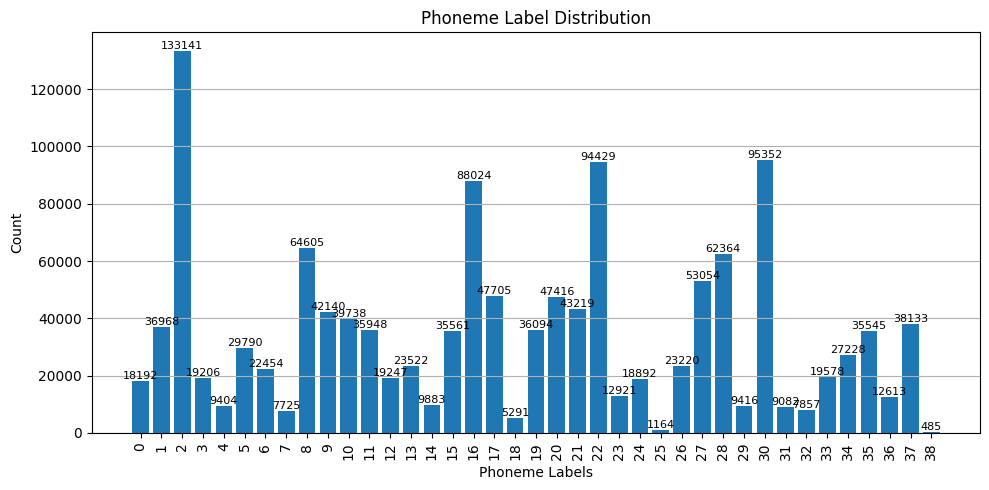

In [3]:
viz_label(train_dataset)

100%|██████████| 555/555 [00:34<00:00, 16.29it/s]


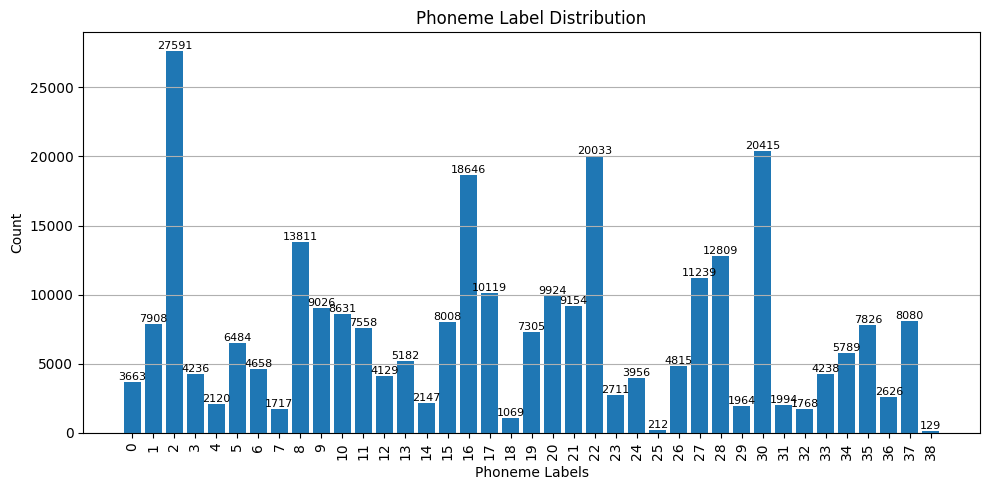

In [4]:
viz_label(val_dataset)